Note:
*  Theo như em đọc thì tần số quét của máy là 50Hz => 1 hàng dữ liệu sẽ xuất hiện sau 0,02s







In [ ]:
!git clone https://github.com/Khanghcmut/ABC_challenge_2026_test.git

fatal: destination path 'ABC_challenge_2026_test' already exists and is not an empty directory.


**LOAD DATASET**


In [ ]:
import pandas as pd
import os
import glob
import numpy as np
data="./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink"
train_files= sorted(glob.glob(os.path.join(data, "1_*.csv")))
test_files= sorted(glob.glob(os.path.join(data, "2_*.csv")))
print(train_files, test_files)


['./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/1_sbj_0.csv', './ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/1_sbj_0_2.csv', './ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/1_sbj_1.csv', './ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/1_sbj_2.csv'] ['./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/2_sbj_0.csv', './ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/2_sbj_0_2.csv', './ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/2_sbj_1.csv', './ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink/2_sbj_2.csv']


In [ ]:
def load_multiple(files):
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df_train = load_multiple(train_files)
df_test  = load_multiple(test_files)
df_train.head()


,leg_acc_x,leg_acc_y,leg_acc_z,arm_acc_x,arm_acc_y,arm_acc_z,label
0,0.978287,-0.111472,0.103445,-0.956057,-0.407509,-0.090828,NaN
1,0.982915,-0.095342,0.083391,-1.167835,-0.088288,-0.131609,NaN
2,0.977757,-0.124765,0.113024,-1.063969,0.080970,-0.140224,NaN
3,0.988421,-0.056063,0.134405,-0.956582,0.273206,-0.157955,NaN
4,0.983513,-0.091392,0.095917,-0.927767,0.462559,-0.206675,NaN


In [ ]:
df_test.head()

,arm_acc_x,arm_acc_y,arm_acc_z,leg_acc_x,leg_acc_y,leg_acc_z,label
0,1.111720,0.064550,0.042595,0.982813,0.113823,0.152618,NaN
1,1.124248,0.264661,-0.027485,0.982286,0.155609,0.135133,NaN
2,0.974202,0.262050,-0.116387,0.988576,0.120453,0.143329,NaN
3,0.956607,0.435791,-0.104167,0.985458,0.116040,0.145114,NaN
4,0.909543,0.438012,-0.078919,0.990536,0.074509,0.140244,NaN


Thứ tự các Cột của 2 file khác nhau nên em sẽ code để sửa lại thứ tự cột

In [ ]:
COLUMN_ORDER = [
    'leg_acc_x', 'leg_acc_y', 'leg_acc_z',
    'arm_acc_x', 'arm_acc_y', 'arm_acc_z',
    'label']

data="./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink"
train_files= sorted(glob.glob(os.path.join(data, "1_*.csv")))
test_files= sorted(glob.glob(os.path.join(data, "2_*.csv")))

def load_multiple(files):
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        if os.path.basename(f).startswith("2_"):
            print(f"Đã sắp xếp lại cột cho file: {os.path.basename(f)}")
            df = df[COLUMN_ORDER]

        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


df_train = load_multiple(train_files)
df_test  = load_multiple(test_files)


print("\n--- df_train.head() (Train) ---")
print(df_train.head())

print("\n--- df_test.head() (Test - Đã Sửa Cột) ---")
print(df_test.head())

Đã sắp xếp lại cột cho file: 2_sbj_0.csv
Đã sắp xếp lại cột cho file: 2_sbj_0_2.csv
Đã sắp xếp lại cột cho file: 2_sbj_1.csv
Đã sắp xếp lại cột cho file: 2_sbj_2.csv

--- df_train.head() (Train) ---
   leg_acc_x  leg_acc_y  leg_acc_z  arm_acc_x  arm_acc_y  arm_acc_z label
0   0.978287  -0.111472   0.103445  -0.956057  -0.407509  -0.090828   NaN
1   0.982915  -0.095342   0.083391  -1.167835  -0.088288  -0.131609   NaN
2   0.977757  -0.124765   0.113024  -1.063969   0.080970  -0.140224   NaN
3   0.988421  -0.056063   0.134405  -0.956582   0.273206  -0.157955   NaN
4   0.983513  -0.091392   0.095917  -0.927767   0.462559  -0.206675   NaN

--- df_test.head() (Test - Đã Sửa Cột) ---
   leg_acc_x  leg_acc_y  leg_acc_z  arm_acc_x  arm_acc_y  arm_acc_z label
0   0.982813   0.113823   0.152618   1.111720   0.064550   0.042595   NaN
1   0.982286   0.155609   0.135133   1.124248   0.264661  -0.027485   NaN
2   0.988576   0.120453   0.143329   0.974202   0.262050  -0.116387   NaN
3   0.985458   0.

Gán nhãn cho hành động

In [ ]:
encode_label = {
    'jogging': 1,
    'jogging (rotating arms)': 2,
    'jogging (skipping)': 3,
    'jogging (sidesteps)': 4,
    'jogging (butt-kicks)': 5,
    'stretching (triceps)': 6,
    'stretching (lunging)': 7,
    'stretching (shoulders)': 8,
    'stretching (hamstrings)': 9,
    'stretching (lumbar rotation)': 10,
    'push-ups': 11,
    'push-ups (complex)': 12,
    'sit-ups': 13,
    'sit-ups (complex)': 14,
    'burpees': 15,
    'lunges': 16,
    'lunges (complex)': 17,
    'bench-dips': 18
}

# map labels
df_train["label"] = df_train["label"].map(encode_label).fillna(0).astype(int)
df_test["label"]  = df_test["label"].map(encode_label).fillna(0).astype(int)
mapped_train = df_train["label"]
mapped_test  = df_test["label"]
print("Mapped train:", pd.Series(mapped_train).unique()[:100])
print("Mapped test:", pd.Series(mapped_test).unique()[:100])

Mapped train: [ 0  1  6  2  7  3 11 12  4  8 13  9 14 16 15 10  5 18 17]
Mapped test: [ 0  1  6  2  7  3 11 12  4  8 13  9 14 16 15 10  5 18 17]


In [ ]:


# Đếm số lần xuất hiện của từng nhãn
label_counts = df_train['label'].value_counts()
label_counts1 = df_test['label'].value_counts()


print("\n--- PHÂN BỐ SỐ LƯỢNG MẪU CHO MỖI NHÃN ---")
print(label_counts)
print(label_counts1)



--- PHÂN BỐ SỐ LƯỢNG MẪU CHO MỖI NHÃN ---
label
0     93263
1     14166
4     13923
17    12736
16    12078
13    11866
7     10990
6     10919
14    10581
12    10351
3     10109
5      9947
8      9815
15     9679
18     9226
10     9144
9      8911
11     8829
2      7905
Name: count, dtype: int64
label
0     93263
1     14166
4     13923
17    12736
16    12078
13    11866
7     10990
6     10919
14    10581
12    10351
3     10109
5      9947
8      9815
15     9679
18     9226
10     9144
9      8911
11     8829
2      7905
Name: count, dtype: int64


# Mean,STD,Max,Min

In [ ]:
df_train.describe()

,leg_acc_x,leg_acc_y,leg_acc_z,arm_acc_x,arm_acc_y,arm_acc_z,label
count,284438.000000,284438.000000,284438.000000,284438.000000,284438.000000,284438.000000,284438.000000
mean,0.798998,0.021292,0.178190,-0.234956,0.331223,-0.213788,6.339058
std,0.664088,0.756627,0.448813,0.949625,0.685297,0.507170,6.205212
min,-3.707192,-7.566127,-5.351895,-7.993350,-3.699039,-4.935192,0.000000
25%,0.424788,-0.383250,0.008521,-0.889984,-0.036383,-0.522198,0.000000
50%,0.912029,-0.047774,0.146510,-0.214874,0.290959,-0.196827,5.000000
75%,0.991949,0.407010,0.348817,0.490716,0.607536,0.072039,12.000000
max,7.809090,7.497794,4.528709,7.992366,7.756198,4.775227,18.000000


In [ ]:
df_test.describe()

,leg_acc_x,leg_acc_y,leg_acc_z,arm_acc_x,arm_acc_y,arm_acc_z,label
count,284438.000000,284438.000000,284438.000000,284438.000000,284438.000000,284438.000000,284438.000000
mean,0.816474,0.013472,0.156083,0.215994,0.343226,-0.262857,6.339058
std,0.672061,0.747227,0.435221,0.882955,0.673225,0.483628,6.205212
min,-4.386869,-6.868563,-4.697156,-7.955080,-3.199071,-4.157889,0.000000
25%,0.444780,-0.350187,0.008136,-0.447606,-0.014712,-0.575157,0.000000
50%,0.927063,0.062167,0.141236,0.166801,0.297528,-0.236516,5.000000
75%,0.998806,0.442247,0.309594,0.880697,0.615521,0.015607,12.000000
max,7.842530,7.689940,5.316301,7.991852,7.964556,4.014189,18.000000


Em sẽ xấp xỉ 1 file csv là 1 người vì theo em đọc 2 bài báo thì mỗi người sẽ là 18 hành động khác nhau

# Test để xác đinh hướng trục x y z

Trong bài báo có nêu ví dụ cách tìm hướng là khi nằm trong lúc sitsup thì trục y của cảm biến tại mắt cá chân ứng với vecto trọng lực còn khi các hành động đứng đứng thì trục x cảm biến ở tay sẽ ứng với vecto trọng lực

Bước 1: Mount Google Drive...
Drive đã được mount.
Bước 2: Đọc tệp 1_sbj_0.csv từ Drive...
Xử lý dữ liệu hoàn tất.
Bước 3: Vẽ 6 Biểu đồ Trục X, Y, Z, Zoom vào khoảng [6815 - 7015]...


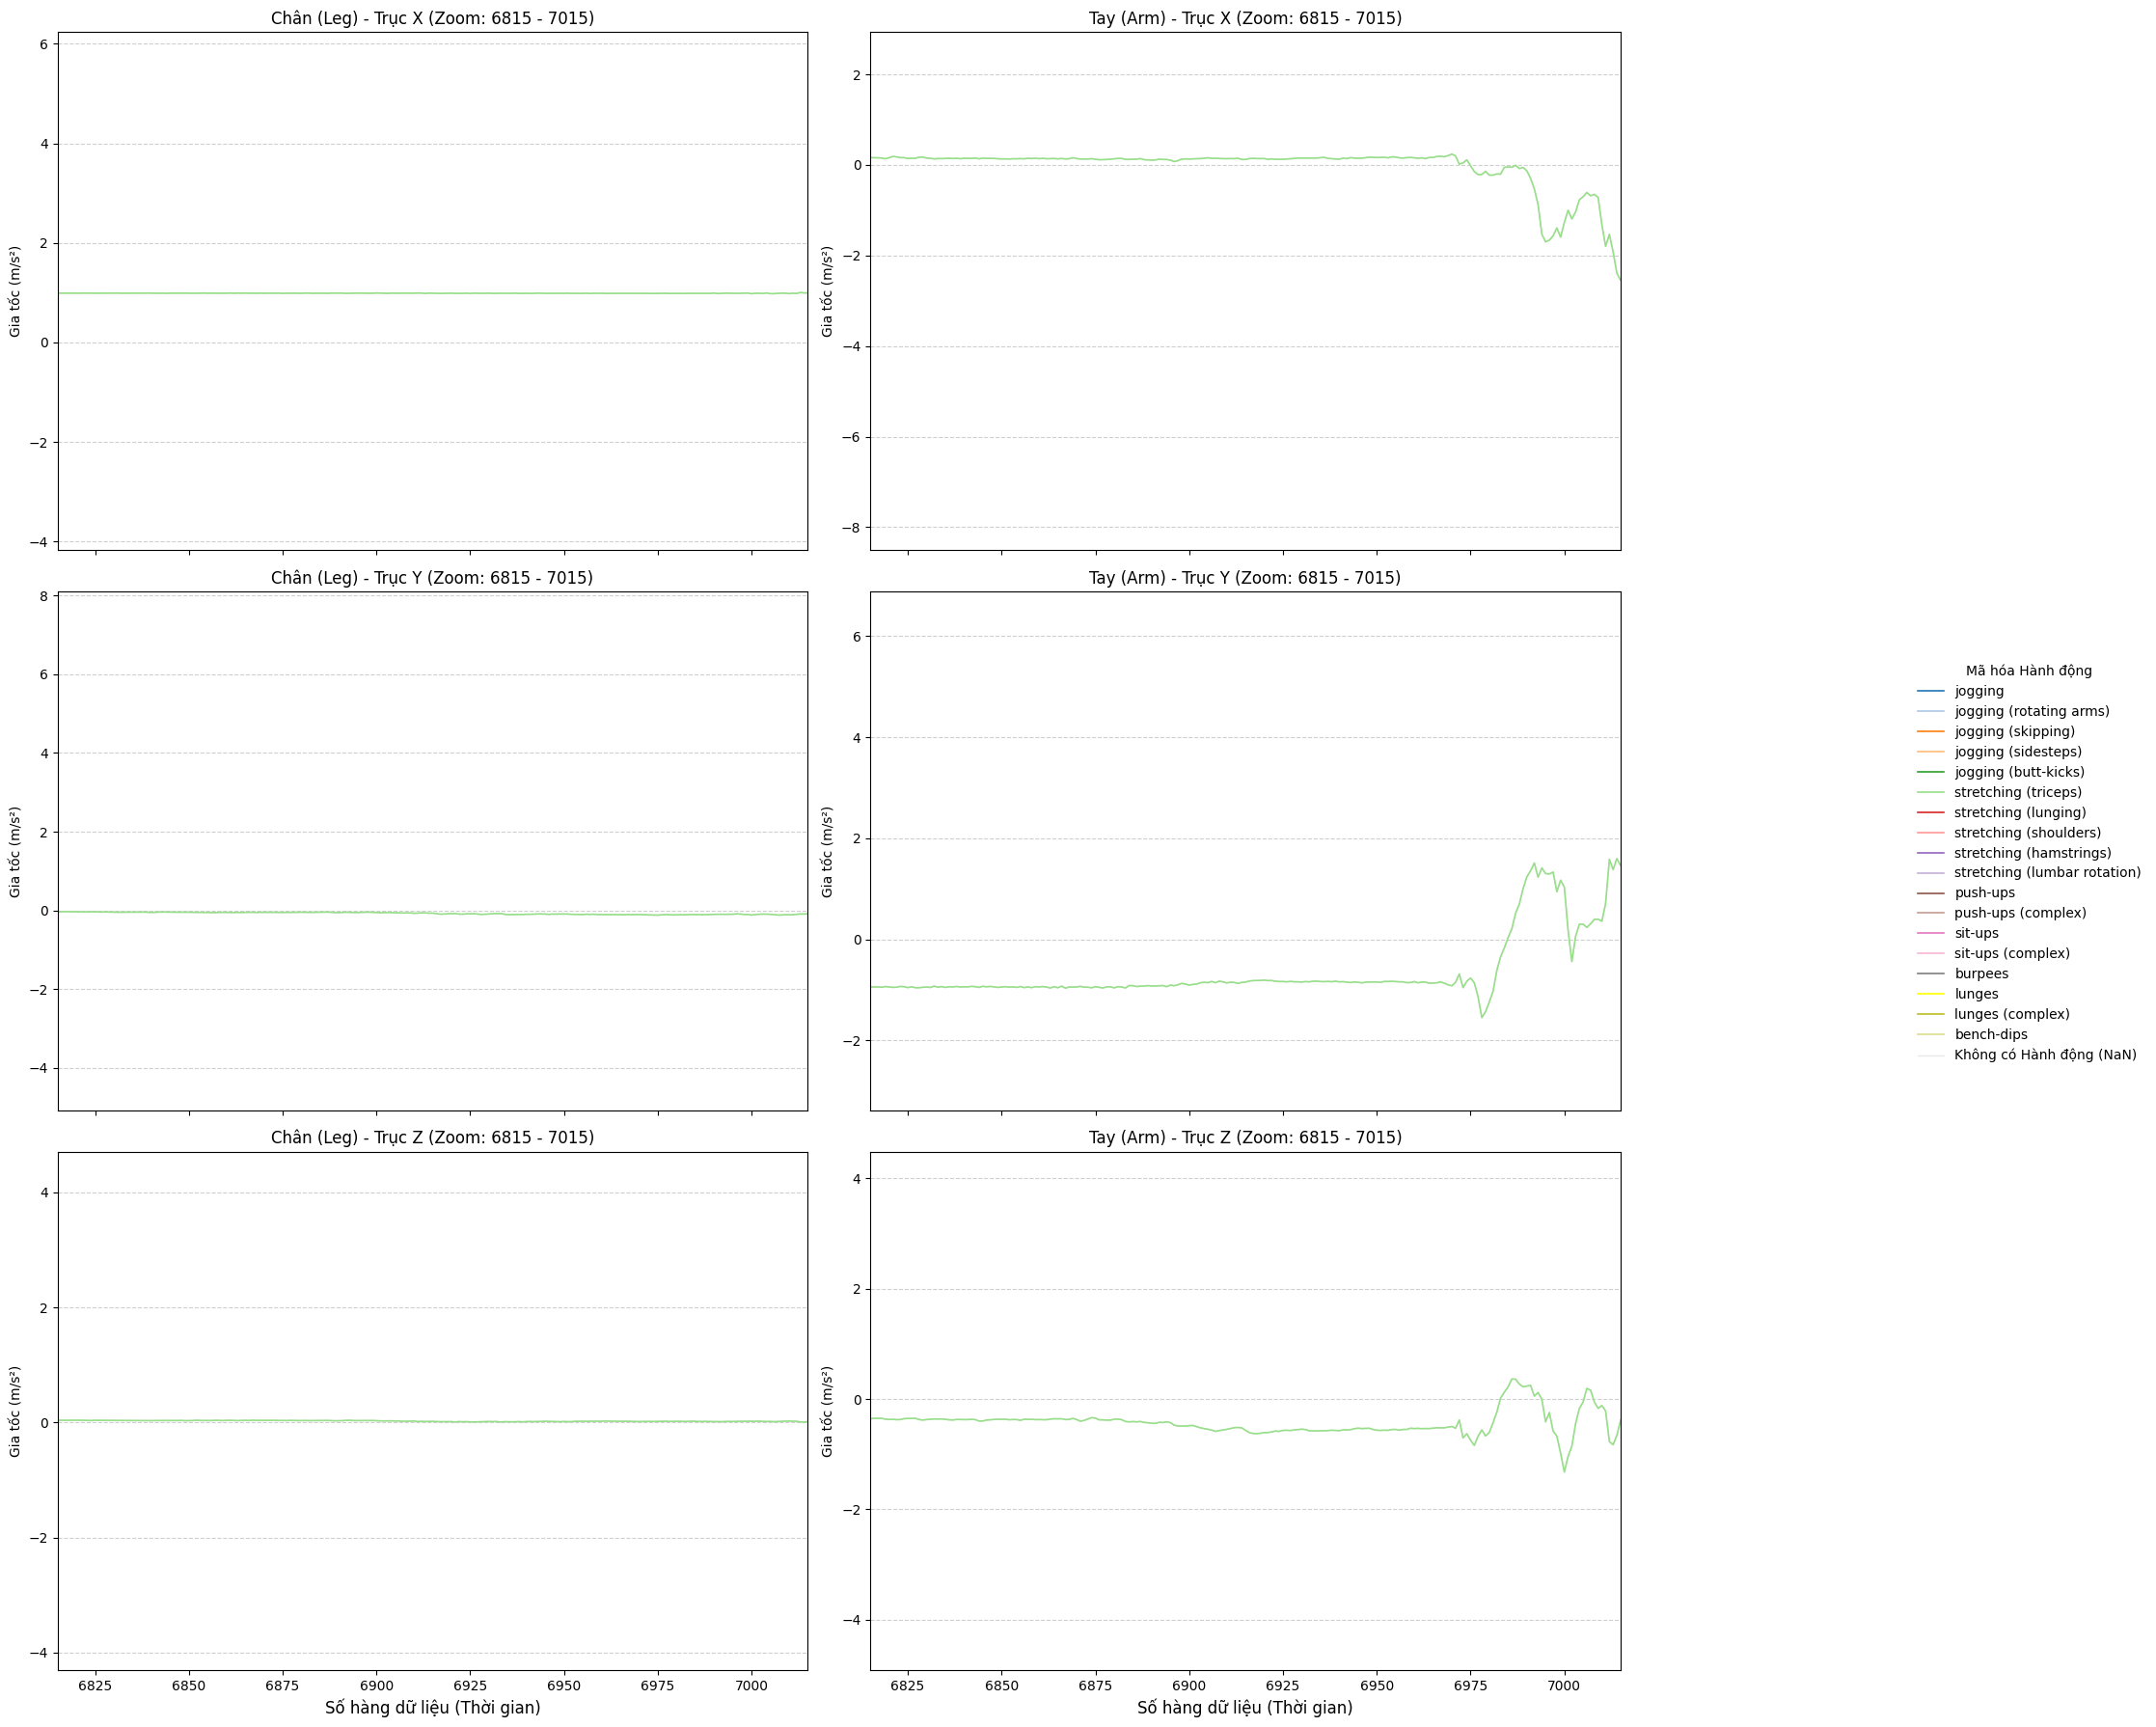

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# =================================================================
# === BƯỚC 1: MOUNT GOOGLE DRIVE ===
print("Bước 1: Mount Google Drive...")
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("Drive đã được mount.")
# =================================================================


# 2. KHAI BÁO CÁC BIẾN VÀ HÀM CẦN THIẾT
FILE_NAME = '1_sbj_0.csv'
DATA_PATH = '/content/drive/MyDrive/'
FULL_FILE_PATH = os.path.join(DATA_PATH, FILE_NAME)

# Mã hóa nhãn (Sử dụng chính xác dictionary do bạn cung cấp)
encode_label = {
    'jogging': 1,
    'jogging (rotating arms)': 2,
    'jogging (skipping)': 3,
    'jogging (sidesteps)': 4,
    'jogging (butt-kicks)': 5,
    'stretching (triceps)': 6,
    'stretching (lunging)': 7,
    'stretching (shoulders)': 8,
    'stretching (hamstrings)': 9,
    'stretching (lumbar rotation)': 10,
    'push-ups': 11,
    'push-ups (complex)': 12,
    'sit-ups': 13,
    'sit-ups (complex)': 14,
    'burpees': 15,
    'lunges': 16,
    'lunges (complex)': 17,
    'bench-dips': 18
}

# 3. ĐỌC DỮ LIỆU VÀ TIỀN XỬ LÝ
try:
    print(f"Bước 2: Đọc tệp {FILE_NAME} từ Drive...")
    df = pd.read_csv(FULL_FILE_PATH)

    # KHÔNG CẦN TÍNH MAGNITUDE NỮA

    # Mã hóa nhãn (NaN/thiếu -> 0)
    df['label_code'] = df['label'].map(encode_label).fillna(0).astype(int)
    print("Xử lý dữ liệu hoàn tất.")

except Exception as e:
    print(f"LỖI xảy ra trong quá trình xử lý dữ liệu: {e}")
    print(f"Vui lòng kiểm tra lại đường dẫn tệp: {FULL_FILE_PATH}")
    exit()


# 4. THIẾT LẬP BẢN ĐỒ MÀU (Logic màu đã được cố định)
action_names_in_order = list(encode_label.keys())
num_actions = len(action_names_in_order)

# 1. Tạo bảng màu tab20
color_palette_main = sns.color_palette("tab20", n_colors=num_actions)

# 2. Ánh xạ màu theo thứ tự cố định của action_names_in_order
label_mapping = {}
for i, name in enumerate(action_names_in_order):
    code = encode_label.get(name)
    label_mapping[code] = color_palette_main[i]

# 3. Gán màu xám nhạt cho nhãn 'no action'
label_mapping[0] = 'lightgray'

# 4. GHI ĐÈ MÀU: Đảm bảo 'lunges' CÓ MÀU VÀNG
if 'lunges' in encode_label:
    lunges_code = encode_label['lunges']
    label_mapping[lunges_code] = 'yellow'

# Tạo bản đồ tên nhãn cho Legend
label_names = {v: k for k, v in encode_label.items()}
label_names[0] = 'Không có Hành động (NaN)'
unique_codes = sorted([v for v in encode_label.values()])


# =================================================================
# === ĐIỀU CHỈNH CÁC BIẾN NÀY ĐỂ CHIA NHỎ KHOẢNG (ZOOM) ===
ZOOM_START = 6815
ZOOM_END = 7015
# =================================================================


# 5. VẼ BIỂU ĐỒ VỚI CÁC TRỤC X, Y, Z VÀ CHỨC NĂNG ZOOM
# Cấu hình 6 biểu đồ con (3 hàng x 2 cột)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18), sharex=True)
plt.subplots_adjust(hspace=0.4, wspace=0.15)

# Danh sách các cột cần vẽ: 3 trục cho Chân và 3 trục cho Tay
plot_cols = [
    'leg_acc_x', 'arm_acc_x',
    'leg_acc_y', 'arm_acc_y',
    'leg_acc_z', 'arm_acc_z'
]

plot_titles = [
    'Chân (Leg) - Trục X', 'Tay (Arm) - Trục X',
    'Chân (Leg) - Trục Y', 'Tay (Arm) - Trục Y',
    'Chân (Leg) - Trục Z', 'Tay (Arm) - Trục Z'
]

print(f"Bước 3: Vẽ 6 Biểu đồ Trục X, Y, Z, Zoom vào khoảng [{ZOOM_START} - {ZOOM_END}]...")

zoom_range = None
if ZOOM_START < ZOOM_END and ZOOM_START >= 0:
    max_index = df.index.max()
    adjusted_zoom_end = min(ZOOM_END, max_index)
    if adjusted_zoom_end > ZOOM_START:
        zoom_range = (ZOOM_START, adjusted_zoom_end)

# Lặp qua tất cả 6 biểu đồ
for i, col_name in enumerate(plot_cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot 'no action' (label 0) làm nền
    ax.plot(df.index, df[col_name], color=label_mapping[0], linewidth=1, alpha=0.5,
            label=label_names[0] if i == 0 else "_nolegend_")

    # Overlay các hành động có nhãn
    for label_val in unique_codes:
        temp_series = df[col_name].where(df['label_code'] == label_val)
        ax.plot(df.index, temp_series, label=label_names.get(label_val),
                color=label_mapping[label_val], linewidth=1.2)

    # ÁP DỤNG GIỚI HẠN X ĐỂ ZOOM
    if zoom_range:
        ax.set_xlim(zoom_range)
        ax.set_title(f'{plot_titles[i]} (Zoom: {zoom_range[0]} - {zoom_range[1]})', fontsize=12)
    else:
        ax.set_title(f'{plot_titles[i]} (Toàn bộ dữ liệu)', fontsize=12)

    ax.set_ylabel('Gia tốc (m/s²)', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Đặt nhãn cho trục X chung cho hàng cuối cùng
axes[2, 0].set_xlabel('Số hàng dữ liệu (Thời gian)', fontsize=12)
axes[2, 1].set_xlabel('Số hàng dữ liệu (Thời gian)', fontsize=12)

# 6. TẠO CHÚ GIẢI CHUNG VÀ HIỂN THỊ
handles, labels = axes[0, 0].get_legend_handles_labels()

# Thu thập và sắp xếp các nhãn theo thứ tự mã hóa gốc
sorted_handles = []
sorted_labels = []

# Thêm hành động theo thứ tự TÊN GỐC (action_names_in_order)
for name in action_names_in_order:
    for h, l in zip(handles, labels):
        if l == name:
            sorted_handles.append(h)
            sorted_labels.append(l)
            break

# Thêm 'No Action' vào cuối danh sách chú giải
for h, l in zip(handles, labels):
    if l == label_names[0]:
        sorted_handles.append(h)
        sorted_labels.append(l)
        break

fig.legend(sorted_handles, sorted_labels, loc='center left', title='Mã hóa Hành động',
           bbox_to_anchor=(0.99, 0.5), fontsize=10, ncol=1, frameon=False)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Boxplot

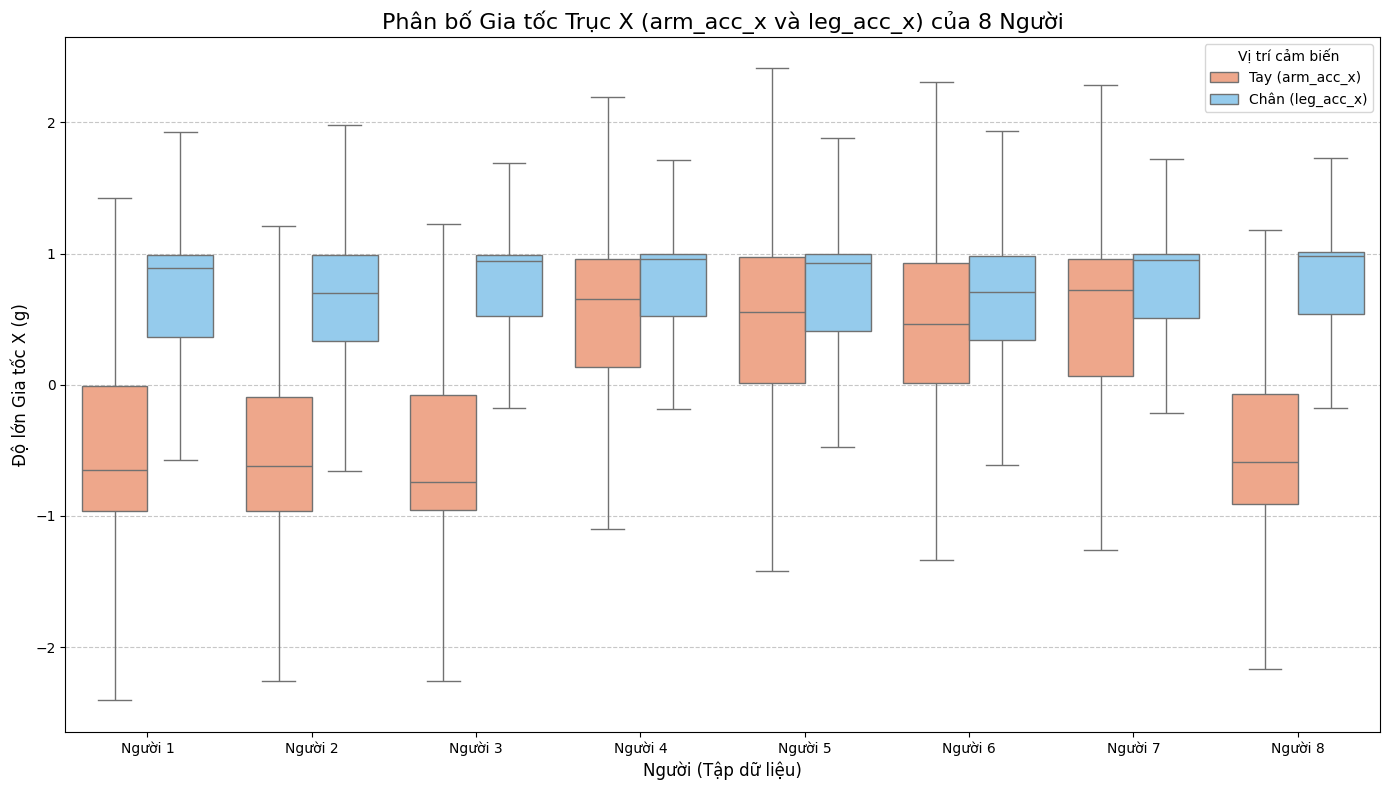

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data="./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink"
# Tên các file đã tải lên và gán tên người dùng
# Dựa trên thông tin đầu vào, ta sắp xếp thứ tự Người
file_names_map = {
    '1_sbj_0.csv': 'Người 1',
    '1_sbj_0_2.csv': 'Người 2',
    '1_sbj_1.csv': 'Người 3',
    '1_sbj_2.csv': 'Người 4',
    '2_sbj_0.csv': 'Người 5',
    '2_sbj_0_2.csv': 'Người 6',
    '2_sbj_1.csv': 'Người 7',
    '2_sbj_2.csv': 'Người 8'
}

all_data = []

# Định nghĩa các cột gia tốc cần quan tâm
TARGET_COLS = ['arm_acc_x', 'leg_acc_x']

# Tải và xử lý từng file
for file_name, subject_name in file_names_map.items():
    # Tải file
    full_file_path = os.path.join(data, file_name) # Construct the full file path
    try:
        df = pd.read_csv(full_file_path)

        # --- Xử lý sự khác biệt về vị trí cột trong các file ---
        # File 1_sbj_x có leg_acc_x trước arm_acc_x
        # File 2_sbj_x có arm_acc_x trước leg_acc_x (Dựa trên snippet: arm_acc_x, arm_acc_y, arm_acc_z, leg_acc_x, leg_acc_y, leg_acc_z, label)

        # Chúng ta sẽ kiểm tra xem cả hai cột có tồn tại không
        if all(col in df.columns for col in TARGET_COLS):
            # Lấy dữ liệu arm_acc_x (gia tốc tay theo trục X)
            arm_data = df[['arm_acc_x']].copy()
            arm_data['Người'] = subject_name
            arm_data['Vị trí'] = 'Tay (arm_acc_x)'
            arm_data.rename(columns={'arm_acc_x': 'Gia tốc X'}, inplace=True)
            all_data.append(arm_data)

            # Lấy dữ liệu leg_acc_x (gia tốc chân theo trục X)
            leg_data = df[['leg_acc_x']].copy()
            leg_data['Người'] = subject_name
            leg_data['Vị trí'] = 'Chân (leg_acc_x)'
            leg_data.rename(columns={'leg_acc_x': 'Gia tốc X'}, inplace=True)
            all_data.append(leg_data)
        else:
            print(f"Cảnh báo: Không tìm thấy cả hai cột {TARGET_COLS} trong file {file_name}. Bỏ qua.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp {full_file_path}. Vui lòng kiểm tra đường dẫn hoặc tên tệp.")
    except Exception as e:
        print(f"Lỗi khi xử lý tệp {full_file_path}: {e}")


# Hợp nhất tất cả dữ liệu
if all_data: # Ensure all_data is not empty before concatenation
    combined_df = pd.concat(all_data)

    # Sắp xếp lại thứ tự Người để đảm bảo Người 1 đến Người 8 theo đúng yêu cầu
    combined_df['Người'] = pd.Categorical(combined_df['Người'], categories=[f'Người {i}' for i in range(1, 9)], ordered=True)
    combined_df = combined_df.sort_values('Người')

    # Thiết lập bảng màu theo yêu cầu: Tay (cam nhạt), Chân (xanh nhạt)
    custom_palette = {
        'Tay (arm_acc_x)': 'lightsalmon',  # Cam nhạt
        'Chân (leg_acc_x)': 'lightskyblue' # Xanh nhạt
    }

    # Vẽ biểu đồ boxplot
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        data=combined_df,
        x='Người',
        y='Gia tốc X',
        hue='Vị trí',
        palette=custom_palette,
        showfliers=False # Ẩn outliers để biểu đồ dễ nhìn hơn
    )

    # Thêm tiêu đề và nhãn
    plt.title('Phân bố Gia tốc Trục X (arm_acc_x và leg_acc_x) của 8 Người', fontsize=16)
    plt.xlabel('Người (Tập dữ liệu)', fontsize=12)
    plt.ylabel('Độ lớn Gia tốc X (g)', fontsize=12)
    plt.legend(title='Vị trí cảm biến')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu nào được tải thành công để tạo biểu đồ.")


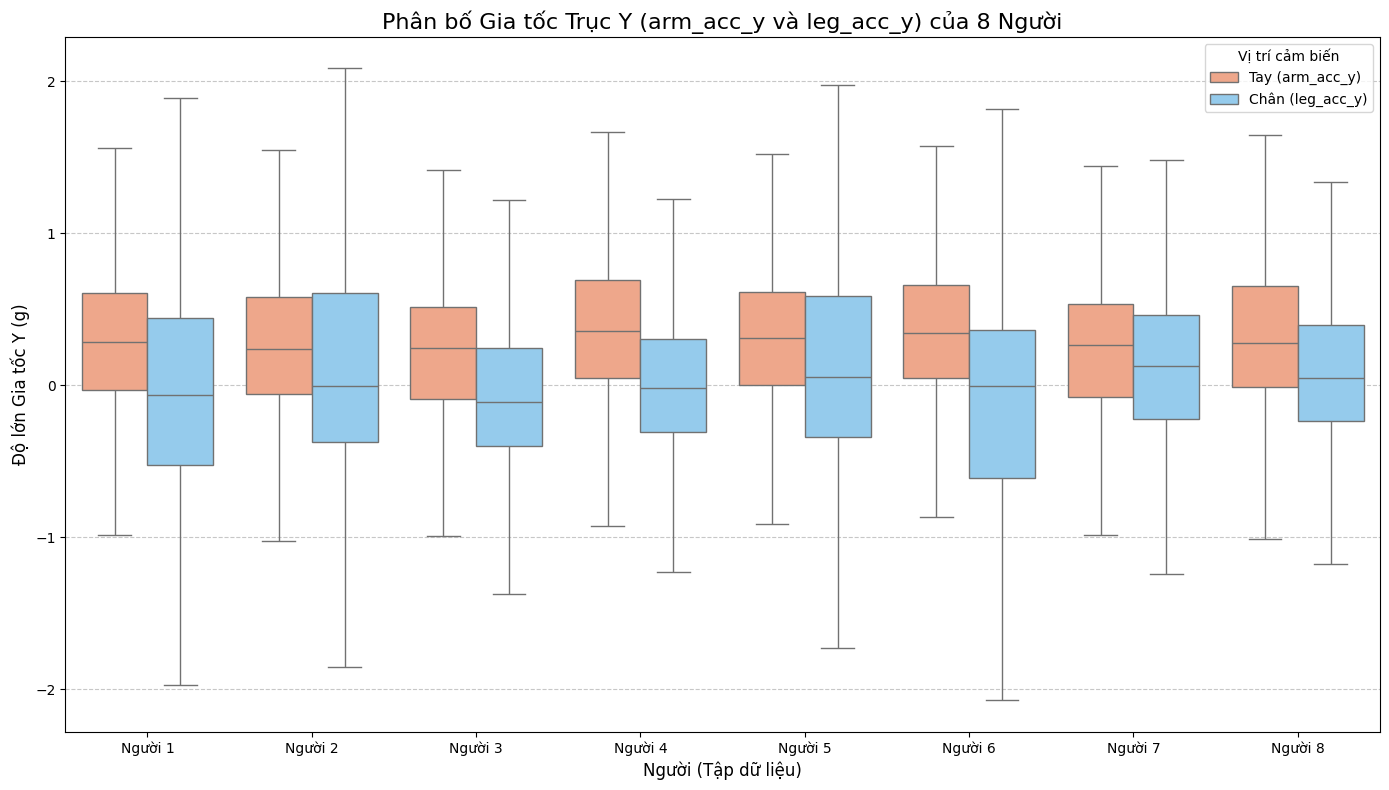

In [ ]:

data="./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink"
# Tên các file đã tải lên và gán tên người dùng
# Dựa trên thông tin đầu vào, ta sắp xếp thứ tự Người
file_names_map = {
 '1_sbj_0.csv': 'Người 1',
    '1_sbj_0_2.csv': 'Người 2',
    '1_sbj_1.csv': 'Người 3',
    '1_sbj_2.csv': 'Người 4',
    '2_sbj_0.csv': 'Người 5',
    '2_sbj_0_2.csv': 'Người 6',
    '2_sbj_1.csv': 'Người 7',
    '2_sbj_2.csv': 'Người 8'
}

all_data = []

# Định nghĩa các cột gia tốc cần quan tâm
TARGET_COLS = ['arm_acc_y', 'leg_acc_y']

# Tải và xử lý từng file
for file_name, subject_name in file_names_map.items():
    # Tải file
    full_file_path = os.path.join(data, file_name) # Construct the full file path
    try:
        df = pd.read_csv(full_file_path)

        # Chúng ta sẽ kiểm tra xem cả hai cột có tồn tại không
        if all(col in df.columns for col in TARGET_COLS):
            # Lấy dữ liệu arm_acc_y (gia tốc tay theo trục Y)
            arm_data = df[['arm_acc_y']].copy()
            arm_data['Người'] = subject_name
            arm_data['Vị trí'] = 'Tay (arm_acc_y)'
            arm_data.rename(columns={'arm_acc_y': 'Gia tốc Y'}, inplace=True)
            all_data.append(arm_data)

            # Lấy dữ liệu leg_acc_y (gia tốc chân theo trục Y)
            leg_data = df[['leg_acc_y']].copy() # Corrected from 'leg_acc_x' to 'leg_acc_y'
            leg_data['Người'] = subject_name
            leg_data['Vị trí'] = 'Chân (leg_acc_y)'
            leg_data.rename(columns={'leg_acc_y': 'Gia tốc Y'}, inplace=True)
            all_data.append(leg_data)
        else:
            print(f"Cảnh báo: Không tìm thấy cả hai cột {TARGET_COLS} trong file {file_name}. Bỏ qua.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp {full_file_path}. Vui lòng kiểm tra đường dẫn hoặc tên tệp.")
    except Exception as e:
        print(f"Lỗi khi xử lý tệp {full_file_path}: {e}")


# Hợp nhất tất cả dữ liệu
if all_data: # Ensure all_data is not empty before concatenation
    combined_df = pd.concat(all_data, ignore_index=True) # Added ignore_index=True to prevent duplicate indices

    # Sắp xếp lại thứ tự Người để đảm bảo Người 1 đến Người 8 theo đúng yêu cầu
    combined_df['Người'] = pd.Categorical(combined_df['Người'], categories=[f'Người {i}' for i in range(1, 9)], ordered=True)
    combined_df = combined_df.sort_values('Người')

    # Thiết lập bảng màu theo yêu cầu: Tay (cam nhạt), Chân (xanh nhạt)
    custom_palette = {
        'Tay (arm_acc_y)': 'lightsalmon',  # Cam nhạt
        'Chân (leg_acc_y)': 'lightskyblue' # Xanh nhạt
    }

    # Vẽ biểu đồ boxplot
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        data=combined_df,
        x='Người',
        y='Gia tốc Y',
        hue='Vị trí',
        palette=custom_palette,
        showfliers=False # Ẩn outliers để biểu đồ dễ nhìn hơn
    )

    # Thêm tiêu đề và nhãn
    plt.title('Phân bố Gia tốc Trục Y (arm_acc_y và leg_acc_y) của 8 Người', fontsize=16)
    plt.xlabel('Người (Tập dữ liệu)', fontsize=12)
    plt.ylabel('Độ lớn Gia tốc Y (g)', fontsize=12)
    plt.legend(title='Vị trí cảm biến')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu nào được tải thành công để tạo biểu đồ.")

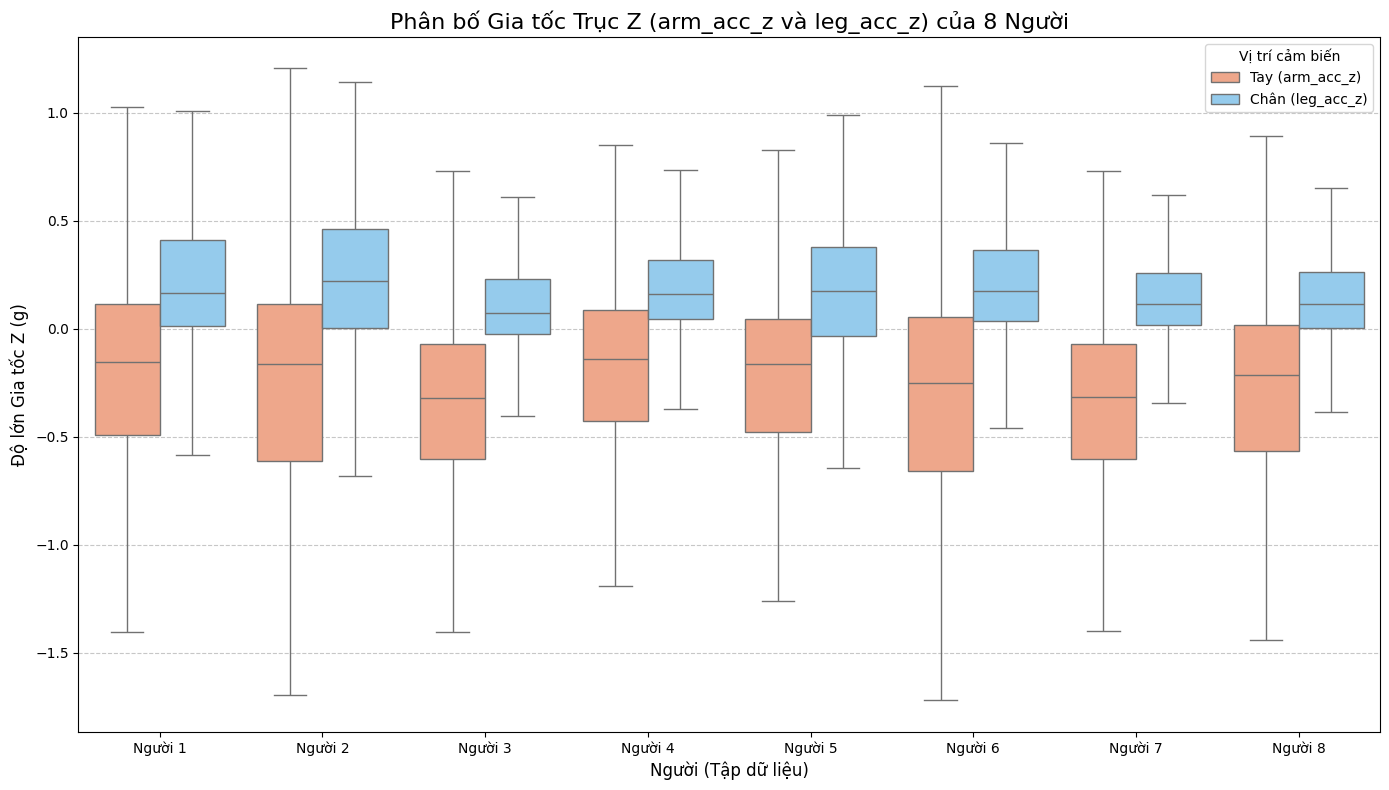

In [ ]:

data="./ABC_challenge_2026_test/Inertial/WEAR/Processed_data_shrink"
# Tên các file đã tải lên và gán tên người dùng
# Dựa trên thông tin đầu vào, ta sắp xếp thứ tự Người
file_names_map = {
    '1_sbj_0.csv': 'Người 1',
    '1_sbj_0_2.csv': 'Người 2',
    '1_sbj_1.csv': 'Người 3',
    '1_sbj_2.csv': 'Người 4',
    '2_sbj_0.csv': 'Người 5',
    '2_sbj_0_2.csv': 'Người 6',
    '2_sbj_1.csv': 'Người 7',
    '2_sbj_2.csv': 'Người 8'
}

all_data = []

# Định nghĩa các cột gia tốc cần quan tâm cho trục Z
TARGET_COLS = ['arm_acc_z', 'leg_acc_z']

# Tải và xử lý từng file
for file_name, subject_name in file_names_map.items():
    # Tải file
    full_file_path = os.path.join(data, file_name) # Construct the full file path
    try:
        df = pd.read_csv(full_file_path)


        # Chúng ta sẽ kiểm tra xem cả hai cột có tồn tại không
        if all(col in df.columns for col in TARGET_COLS):
            # Lấy dữ liệu arm_acc_z (gia tốc tay theo trục Z)
            arm_data = df[['arm_acc_z']].copy()
            arm_data['Người'] = subject_name
            arm_data['Vị trí'] = 'Tay (arm_acc_z)'
            arm_data.rename(columns={'arm_acc_z': 'Gia tốc Z'}, inplace=True)
            all_data.append(arm_data)

            # Lấy dữ liệu leg_acc_z (gia tốc chân theo trục Z)
            leg_data = df[['leg_acc_z']].copy()
            leg_data['Người'] = subject_name
            leg_data['Vị trí'] = 'Chân (leg_acc_z)'
            leg_data.rename(columns={'leg_acc_z': 'Gia tốc Z'}, inplace=True)
            all_data.append(leg_data)
        else:
            print(f"Cảnh báo: Không tìm thấy cả hai cột {TARGET_COLS} trong file {file_name}. Bỏ qua.")
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy tệp {full_file_path}. Vui lòng kiểm tra đường dẫn hoặc tên tệp.")
    except Exception as e:
        print(f"Lỗi khi xử lý tệp {full_file_path}: {e}")


# Hợp nhất tất cả dữ liệu
if all_data: # Ensure all_data is not empty before concatenation
    combined_df = pd.concat(all_data, ignore_index=True) # Added ignore_index=True to prevent duplicate indices

    # Sắp xếp lại thứ tự Người để đảm bảo Người 1 đến Người 8 theo đúng yêu cầu
    combined_df['Người'] = pd.Categorical(combined_df['Người'], categories=[f'Người {i}' for i in range(1, 9)], ordered=True)
    combined_df = combined_df.sort_values('Người')

    # Thiết lập bảng màu theo yêu cầu: Tay (cam nhạt), Chân (xanh nhạt)
    custom_palette = {
        'Tay (arm_acc_z)': 'lightsalmon',  # Cam nhạt
        'Chân (leg_acc_z)': 'lightskyblue' # Xanh nhạt
    }

    # Vẽ biểu đồ boxplot
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        data=combined_df,
        x='Người',
        y='Gia tốc Z',
        hue='Vị trí',
        palette=custom_palette,
        showfliers=False # Ẩn outliers để biểu đồ dễ nhìn hơn
    )

    # Thêm tiêu đề và nhãn
    plt.title('Phân bố Gia tốc Trục Z (arm_acc_z và leg_acc_z) của 8 Người', fontsize=16)
    plt.xlabel('Người (Tập dữ liệu)', fontsize=12)
    plt.ylabel('Độ lớn Gia tốc Z (g)', fontsize=12)
    plt.legend(title='Vị trí cảm biến')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu nào được tải thành công để tạo biểu đồ.")